# Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the Data

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
print(data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


# Data Pre-processing

In [3]:
# Convert 'Gender' to numerical values using one-hot encoding
#data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

#Extracting Independent and dependent Variable  
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (for Logistic Regression and SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Classification Models

## 1. Logistic Regression

### Model Fitting

In [4]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

### Accuracy and Confusion Matrix

In [5]:
acc_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Accuracy: ", acc_logreg)
print("Confusion Matrix:\n", conf_matrix_logreg)

Accuracy:  0.8625
Confusion Matrix:
 [[50  2]
 [ 9 19]]


### Visualization

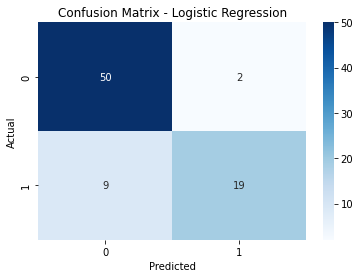

In [6]:
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

#### Visualizing the Training Set Result

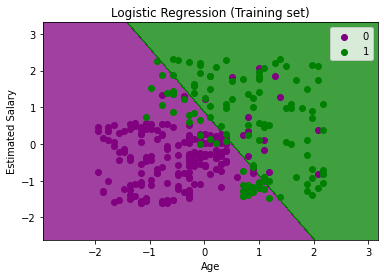

In [7]:
x_set, y_set = X_train, y_train  
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, logreg.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('purple', 'green')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=ListedColormap(('purple', 'green'))(i), label=j) 

plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### Visualizing the Test Set Result

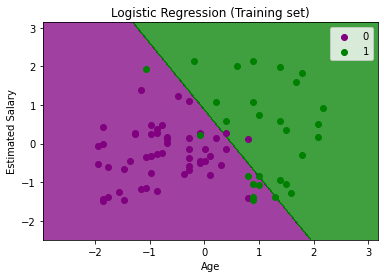

In [8]:
x_set, y_set = X_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, logreg.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('purple', 'green')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=ListedColormap(('purple', 'green'))(i), label=j)  # Use color instead of c

plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## 2. Support Vector Machine(SVM)

### Model Fitting

In [21]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

### Accuracy and Confusion Matrix

In [22]:
acc_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Accuracy: ", acc_svm)
print("Confusion Matrix:\n", conf_matrix_svm)

Accuracy:  0.8625
Confusion Matrix:
 [[50  2]
 [ 9 19]]


### Visualization

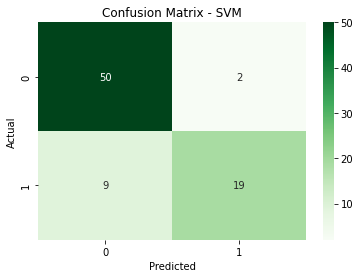

In [28]:
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

#### Visualizing the Training Set Result

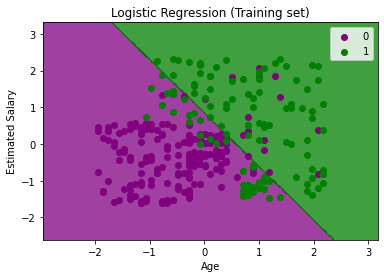

In [29]:
x_set, y_set = X_train, y_train  
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, svm.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('purple', 'green')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=ListedColormap(('purple', 'green'))(i), label=j) 

plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### Visualizing the Test Set Result

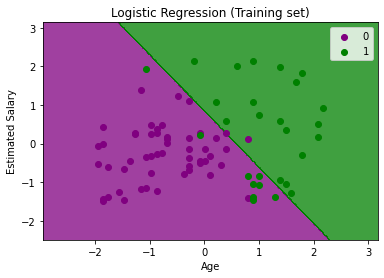

In [30]:
x_set, y_set = X_test, y_test 
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, svm.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('purple', 'green')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=ListedColormap(('purple', 'green'))(i), label=j) 

plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## 3. Decision Tree

### Model Fitting

In [14]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

### Accuracy and Confusion Matrix

In [15]:
acc_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Accuracy: ", acc_dt)
print("Confusion Matrix:\n", conf_matrix_dt)

Accuracy:  0.8375
Confusion Matrix:
 [[46  6]
 [ 7 21]]


### Visualization

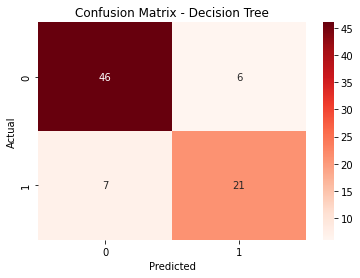

In [25]:
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

#### Visualizing the Training Set Result

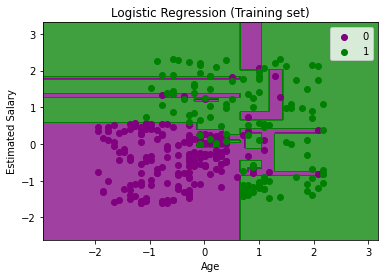

In [26]:
x_set, y_set = X_train, y_train 
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, dt.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('purple', 'green')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=ListedColormap(('purple', 'green'))(i), label=j) 

plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### Visualizing the Test Set Result

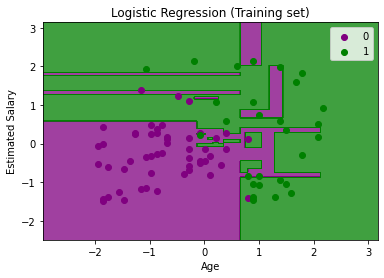

In [27]:
x_set, y_set = X_test, y_test 
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, dt.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('purple', 'green')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=ListedColormap(('purple', 'green'))(i), label=j) 

plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## 4. Random Forest

### Model Fitting

In [19]:
rf = RandomForestClassifier(n_estimators= 10, criterion="entropy")
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

### Accuracy and Confusion Matrix

In [20]:
acc_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Accuracy: ", acc_rf)
print("Confusion Matrix:\n", conf_matrix_rf)

Accuracy:  0.8875
Confusion Matrix:
 [[47  5]
 [ 4 24]]


### Visualization

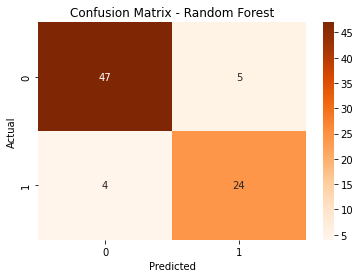

In [23]:
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

#### Visualizing the Training Set Result

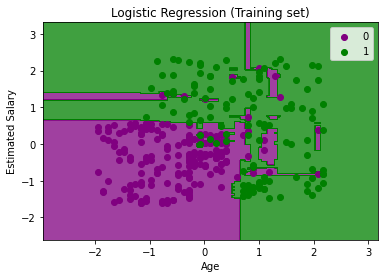

In [24]:
x_set, y_set = X_train, y_train 
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, rf.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('purple', 'green')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=ListedColormap(('purple', 'green'))(i), label=j) 

plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### Visualizing the Test Set Result

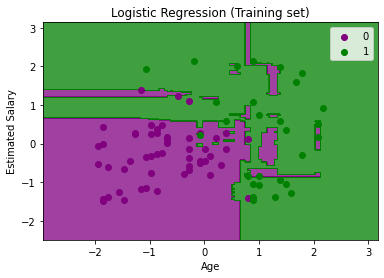

In [31]:
x_set, y_set = X_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, rf.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('purple', 'green')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=ListedColormap(('purple', 'green'))(i), label=j) 

plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Interpretation of Graph

### The graph can be explained in the below points:

1. In the above graphs, we can see that there are some Green points within the green region and Purple points within the purple region.

2. All these data points are the observation points from the training and test set, which shows the result for purchased variables.

3. This graph is made by using two independent variables i.e., Age on the x-axis and Estimated salary on the y-axis.

4. The purple point observations are for which purchased (dependent variable) is probably 0, i.e., users who did not purchase the Ads.

5. The green point observations are for which purchased (dependent variable) is probably 1 means user who purchased the Ads.

6. We can also estimate from the graph that the users who are younger with low salary, did not purchase the Ads, whereas older users with high estimated salary purchased the Ads.

7. But there are some purple points in the green region (Buying the Ads) and some green points in the purple region(Not buying the Ads). So we can say that younger users with a high estimated salary purchased the Ads, whereas an older user with a low estimated salary did not purchase the Ads.

### The goal of the classifier:

We have successfully visualized the training and test set result, and our goal for this classification is to divide the users who purchased the Ads and who did not purchase the Ads. So from the output graph, we can clearly see the two regions (Purple and Green) with the observation points. The Purple region is for those users who didn't buy the Ads, and Green Region is for those users who purchased the Ads.

## Evaluting Hypothesis

### Observation:
1. Accuracy of Logistic Regression: 0.8625 or 86.25%
2. Accuracy of Logistic Regression: 0.8625 or 86.25%
3. Accuracy of Logistic Regression: 0.8375 or 83.75%
4. Accuracy of Logistic Regression: 0.8875 or 88.75%

#### Evalution using Visual Inspection

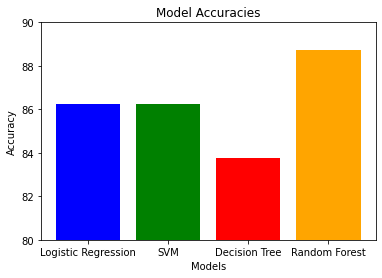

In [35]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']
accuracies = [86.25, 86.25, 83.75, 88.75]

plt.bar(models, accuracies, color=['blue', 'green', 'red', 'orange'])
plt.ylim(80, 90)
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

#### Evalution using ANOVA

In [37]:
from scipy.stats import f_oneway

logreg_acc = [0.8625] * 100  # Assuming 100 samples for each model
svm_acc = [0.8625] * 100
dt_acc = [0.8375] * 100
rf_acc = [0.8875] * 100

# Perform ANOVA
p_value = f_oneway(logreg_acc, svm_acc, dt_acc, rf_acc)

print(f'p-value: {p_value}')


p-value: F_onewayResult(statistic=inf, pvalue=0.0)


### Final Evalution:
The p-value is less than chosen significance level (0.05), the null hypothesis is rejected, indicating that there is a significant difference in the mean accuracies of the models.